## 100_RQ1 - 
"What was the golden year for the industry in terms of release numbers and overall sales, both globally and in the separate regions"

## Purpose

In this notebook we will return to our first research question where we analysed the best year to release games in terms of sales , the numbers released this is in terms of the industry. We also analysed the best year in terms of the gamers perspective where we checked the best year in terms of score reviews , the best score phrases and the average rating scored per year. 

- Yearly sales per Genre
- Global sales by year
- Average score by year 
- Highest scored phrase
- Highest scored year 

### Datasets

- Input : 100_Golden_Year.pkl
- Output : N/a

In [1]:
import sys 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt

import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

C:\Users\adacazine\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Check if everything loads in correctly otherwise print an error message
if not os.path.exists("../../data/analysis/100_Golden_year.pkl"):
    print("Missing Dataset File")

In [3]:
# Check if everything loads in correcly otherwise print an error message
if not os.path.exists("../../data/prep/Clean_Combined.pkl"):
    print("Missing Dataset File")

In [4]:
# the combined dataset stored in a variable called total
total = pd.read_pickle("../../data/prep/Clean_Combined.pkl")

In [5]:
# The notebook from the 100 prep of the golden year stored in a variable called result
result  = pd.read_pickle("../../data/analysis/100_Golden_year.pkl")

In [6]:
# Matplotlib configurations that will be used to draw all of our graphs 
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22


## Top 5 Genres Yearly sales

What we would like to visualise and see is the top 5 selling genres and their sales across the 30 years. The top 5 genres are defined as the ones with the most sales these include Action Sports Misc Role_Playing and Shooter. The number of sales will be plotted along the y axis and these are measured in millions. The Years are along the x axis. The legend in the top left corner indicates the colour for each genre. 

Text(0,0.5,'Number of Sales(Millions)')

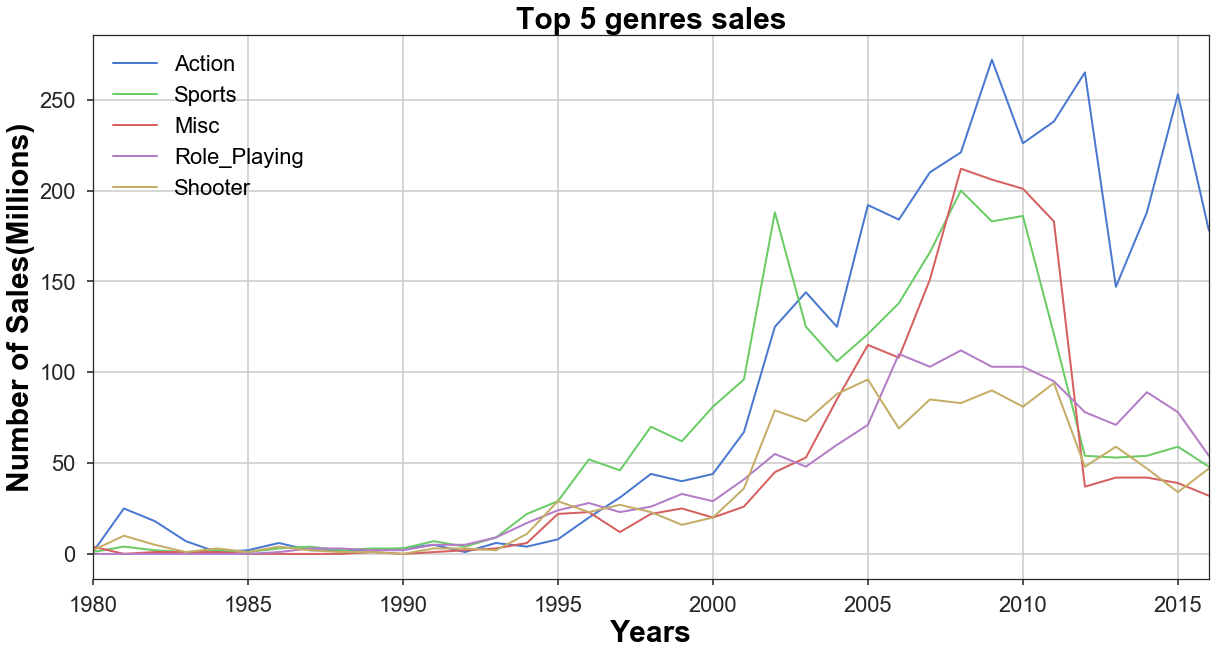

In [7]:
# creating a lin graph with the argumet action, sports, misc, role playin and shooter 
ax = result.plot(y=['Action','Sports','Misc','Role_Playing','Shooter'], kind = 'line', title = 'Yearly sales per genre', figsize = (20,10))
ax.set_title('Top 5 genres sales', size=30)
ax.set_xlabel("Years", size=30)
# Size is 30 for all the fonts 
ax.set_ylabel("Number of Sales(Millions)",size=30)

## Global Sales by year

What we would like to do now is check the global sales on a year to year basis. This will help us analyse the golden year in terms of the industry level and the best year to release a game. 

In [8]:
# We are resampling our golden year dataset by the business year end to calculate the sales at the last day of the year 
totals = total.resample("A").sum()

Text(0,0.5,'Number of sales(millions)')

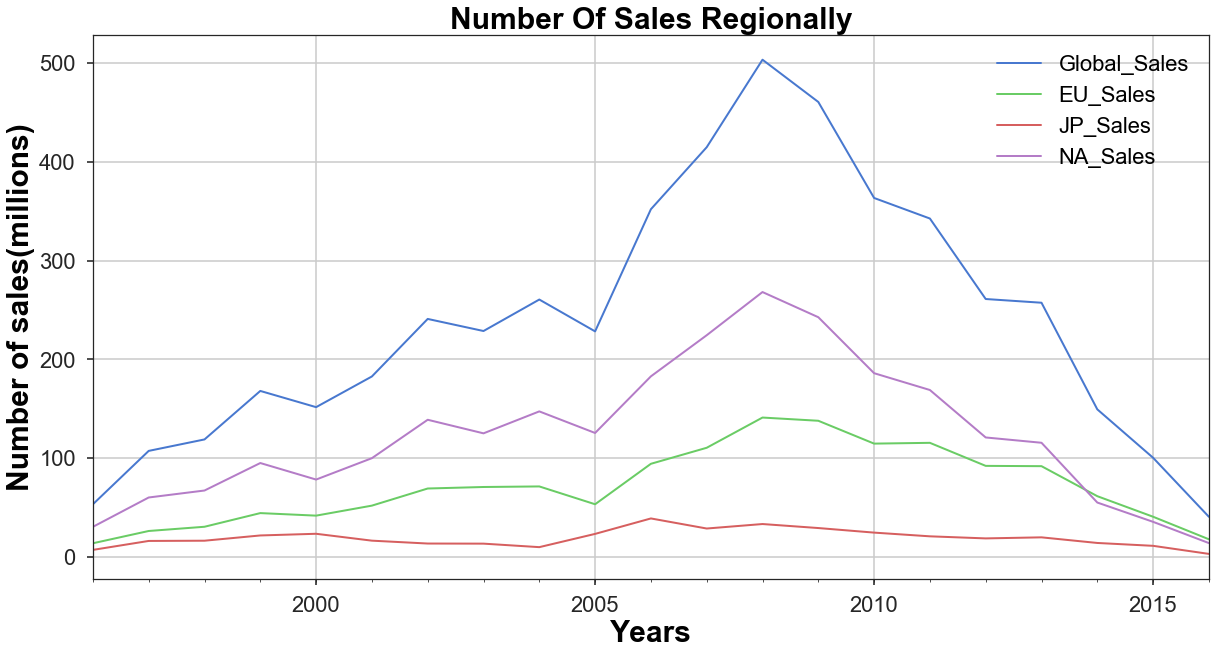

In [9]:
# Again we will plot our resampled data with the arguments being global_sales, EU_sales, JP_Sales, NA_Sales
# It will be plotted on a bar chart so that it is easier to visualise the best year for each region
ax = totals.plot(y=['Global_Sales','EU_Sales','JP_Sales','NA_Sales'], kind = 'line', title = 'Eu Sales Per year', figsize=(20,10))
ax.set_title('Number Of Sales Regionally', size=30)
# Again all the size fonts are 30 
ax.set_xlabel("Years", size=30)
ax.set_ylabel("Number of sales(millions)",size=30)

As seen above by the bar chart representation 2008 was the best year to release a game globally in terms of sales figures. 2008 was again the best year to release a game across the european and the north american regions. The only difference in the graph above was that the best year to release a game in the japanese regions was 2006 which interesting to note the difference. It is also interesting to note that 2008 had the highest release rate because this was a time of the financial crisis. 

### Average Score By Year

Next we would like to see the average score per year. This is to see the golden year in terms of the gamers side of the industry. We would like to see is 2008 also the best year in terms of the average score of a game ? 

In [10]:
# Resampling the dataframe by business year end again and finding the mean of it 
avg = total.resample("A").mean()
# finding the mean score for each year 
average = avg['score']



Text(0,0.5,'Scores')

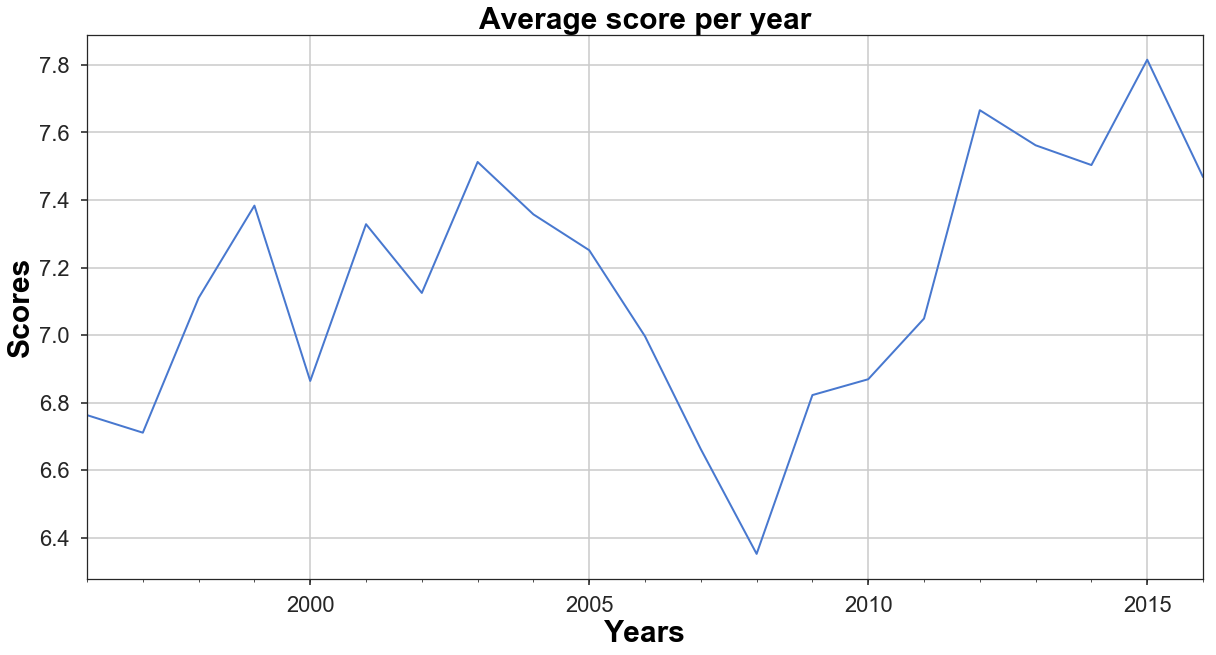

In [11]:
# Plotting the average score tht we found above as a line graph
ax = average.plot(kind='line', figsize=(20,10))
ax.set_title('Average score per year', size=30)
# size is 30 again to be consistent 
ax.set_xlabel("Years", size=30)
ax.set_ylabel("Scores",size=30)

As we can see from our graph above the gamers golden year was infact different to that of the industry. The highest average scored year was 2015. We then searched up some of the games that were released in 2015 and we had a look at what was released and realised that this is in fact true as there were some good releases in 2015. As mentioned before 2008 was the best year for the industry and in this graph it is interesting to note that 2008 was the lowest average scored year indicating 2008 was only good for the industry

## Highest Scored Phrase year

We also wanted to see what year had the highest scored phrase

In [12]:
# using strftime again but this time to convert it into a yearly basis and count the score phrases
res = total.groupby(total.index.strftime('%Y'))['score_phrase'].count()

Text(0,0.5,'Score counts')

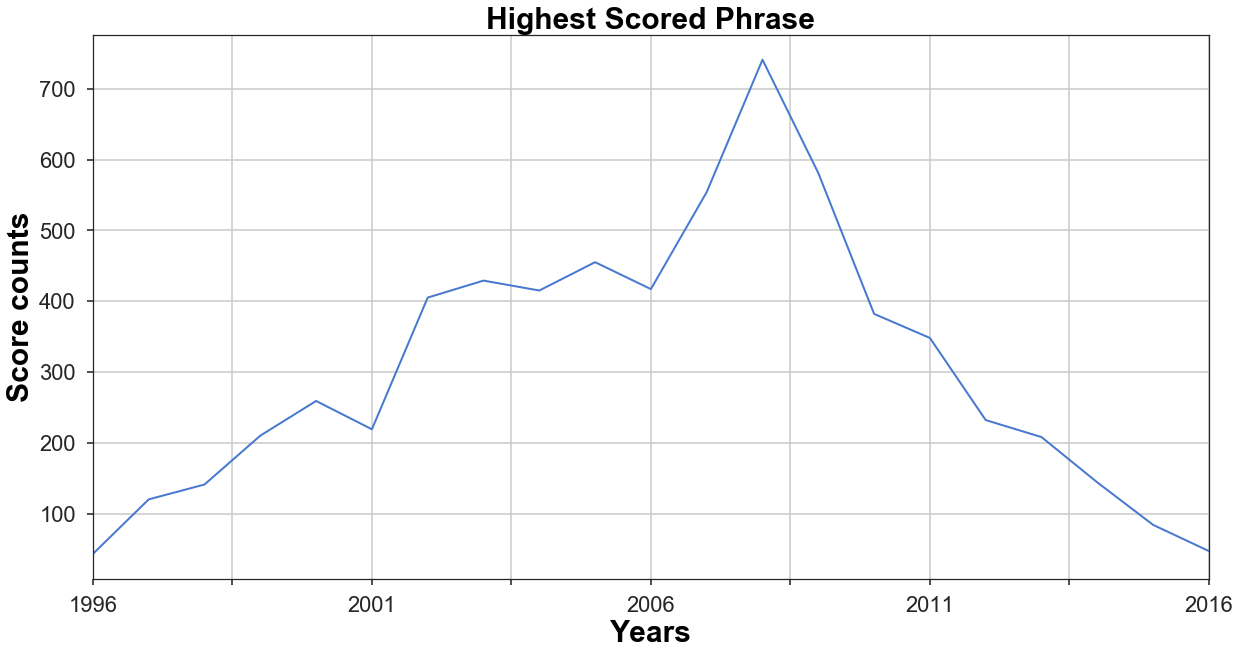

In [13]:
# plotting the yearly results in a pie chart 
# res.plot(kind='pie', y = 'res', autopct = '%1.1f%%', startangle=90, shadow=False, legend=False,
#          fontsize =10, figsize=(10,10))
ax = res.plot(kind='line', figsize=(20,10))
ax.set_title('Highest Scored Phrase', size=30)
# size is 30 again to be consistent 
ax.set_xlabel("Years", size=30)
ax.set_ylabel("Score counts",size=30)

As seen above in the pie chart, 2008 was the highest year where score phrases were used which again correlates to the industries golden year. The gamers golden year 2015 contains very little use of the score phrase.

## Highest scored Year

We wanted to see what year had the highest scores. 


In [14]:
# we now use strftime to convert the grouoby into a yearly format and sum the score. 
resul = total.groupby(total.index.strftime('%Y'))['score'].sum()
resul

1996     290.8
1997     805.3
1998    1002.5
1999    1550.5
2000    1777.8
2001    1604.9
2002    2885.5
2003    3222.9
2004    3053.3
2005    3299.3
2006    2917.4
2007    3690.7
2008    4706.7
2009    3963.7
2010    2624.0
2011    2453.0
2012    1778.5
2013    1572.9
2014    1080.5
2015     656.5
2016     351.0
Name: score, dtype: float64

Text(0,0.5,'Number of Scores')

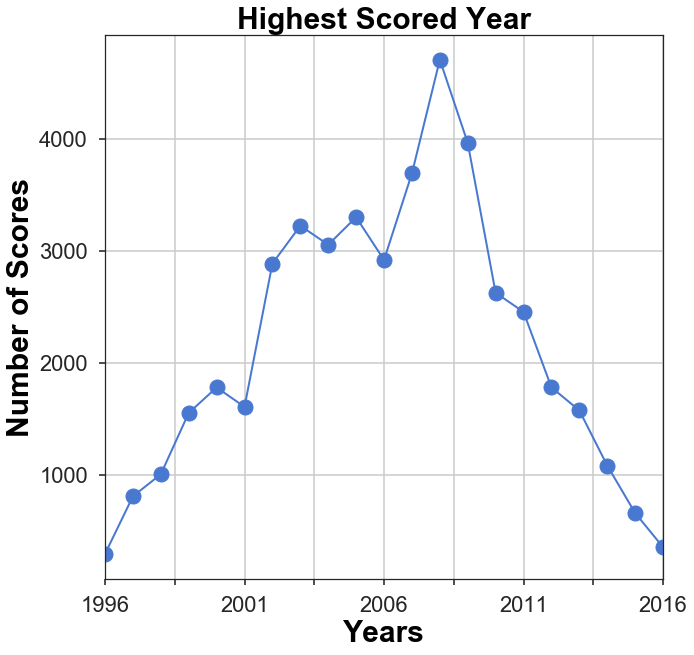

In [15]:
# We will use a graph with a marker o that will be connected with each other using a -. 
ax =resul.plot(linestyle='-', marker='o', title='Highest Score Year', figsize=(10,10))
ax.set_title('Highest Scored Year', size=30)
# Sizes are set to 30 to be consistent 
ax.set_xlabel("Years", size=30)
ax.set_ylabel("Number of Scores",size=30)

As we can see from the above graph it is an analyses of the trends and the scores from the last 30 years.The graph hits an all time peak during 2008. with it being the highest scored year then it slowly begins to drop on a year to year basis again. Even though 2015 was the highest average it has one of the lowest scored years in total 

## Number of Releases per Year

Next we wanted to check the amount of releases made per year 

In [16]:
total.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2006-11-13,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Good,7.5,N
2008-04-20,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Great,8.5,Y
2009-07-16,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Good,7.7,N
2006-05-06,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Amazing,9.5,Y
2009-11-13,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Great,8.9,Y


In [17]:
# Counting the numbers of releases made per year
year = total.groupby(total.index.strftime('%Y'))['Name'].count()
year


1996     43
1997    120
1998    141
1999    210
2000    259
2001    219
2002    405
2003    429
2004    415
2005    455
2006    417
2007    554
2008    741
2009    581
2010    382
2011    348
2012    232
2013    208
2014    144
2015     84
2016     47
Name: Name, dtype: int64

Text(0,0.5,'Number of Releases per year')

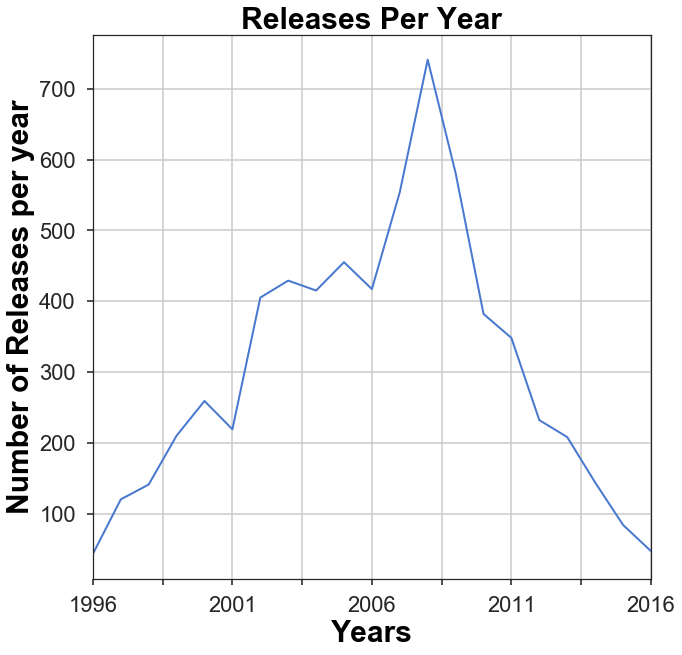

In [18]:
# Plotting the yearly releases on a line graph 
ax = year.plot(kind='line', figsize=(10,10))
ax.set_title('Releases Per Year', size=30)
ax.set_xlabel("Years", size=30)
ax.set_ylabel("Number of Releases per year",size=30)
# Size set to 30 

As we can see from our graph of the 20 years the number of releases gradually increases from 1996 to 2008 where again it hits an all time high and then it slowly begins to decrease again this is proabably due to the fact that console releases became less popular and pc games took over

## Average Sales per Year

Lets check the average sales per year

In [19]:
# Gettin the total sales for each year
sales = total.groupby(total.index.strftime('%Y'))['Global_Sales'].sum()
sales

1996     53.28
1997    107.31
1998    118.91
1999    168.00
2000    151.59
2001    182.65
2002    240.88
2003    228.65
2004    260.51
2005    228.28
2006    351.92
2007    414.68
2008    503.26
2009    460.49
2010    363.31
2011    342.51
2012    261.04
2013    257.28
2014    149.36
2015    100.35
2016     40.59
Name: Global_Sales, dtype: float64

In [20]:
# Sales_byyear is created with the total sales being divided by the number of releases made that year to get the average
sales_byyear = sales.div(year)
sales_byyear

1996    1.239070
1997    0.894250
1998    0.843333
1999    0.800000
2000    0.585290
2001    0.834018
2002    0.594765
2003    0.532984
2004    0.627735
2005    0.501714
2006    0.843933
2007    0.748520
2008    0.679163
2009    0.792582
2010    0.951073
2011    0.984224
2012    1.125172
2013    1.236923
2014    1.037222
2015    1.194643
2016    0.863617
dtype: float64

Text(0.5,0,'Years')

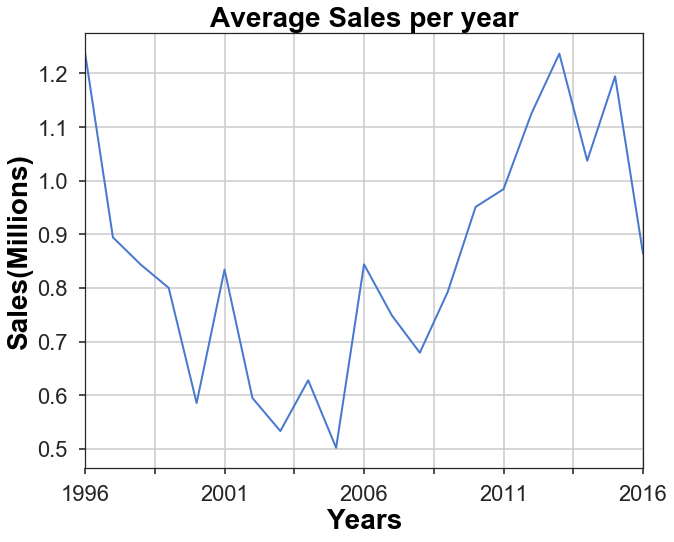

In [21]:
# Plotting the average sales for each year on a line graph. 
ax = sales_byyear.plot(kind='line', figsize=(10,8))
# sales are represented in terms of millions
ax.set_title("Average Sales per year")
ax.set_ylabel("Sales(Millions)")
ax.set_xlabel("Years")

As we can see from the above graph the average sales figures fluctuate. As seen above the sales figures are quite high during the 1996 year indicating there was a good average sale of games in those years. Again its interesting to see that in 2008 the games were at quite a low average and then it rose again in 2013 giving a higher average sales figure.

In [22]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'sys',
 'os',
 'pandas',
 'numpy',
 'matplotlib.pylab',
 'seaborn',
 'statsmodels',
 'statsmodels.api',
 'types']